# Caso de uso de Simulación de Eventos Discretos con SimPy

Banco renegado
 0.0000 Cliente00: Aqui estoy
 0.0000 Cliente00: Espere  0.000
 1.9010 Cliente00: Termine
 5.9763 Cliente01: Aqui estoy
 5.9763 Cliente01: Espere  0.000
 8.1496 Cliente02: Aqui estoy
10.5497 Cliente02: me voy despues de  2.400
10.6802 Cliente03: Aqui estoy
11.9788 Cliente03: me voy despues de  1.299
13.1537 Cliente01: Termine
22.7211 Cliente04: Aqui estoy
22.7211 Cliente04: Espere  0.000
24.3380 Cliente05: Aqui estoy
25.6380 Cliente06: Aqui estoy
27.0215 Cliente05: me voy despues de  2.683
28.4989 Cliente06: me voy despues de  2.861
31.0099 Cliente04: Termine
44.0735 Cliente07: Aqui estoy
44.0735 Cliente07: Espere  0.000
52.7467 Cliente07: Termine
70.7298 Cliente08: Aqui estoy
70.7298 Cliente08: Espere  0.000
76.8351 Cliente09: Aqui estoy
78.4851 Cliente09: me voy despues de  1.650
105.0202 Cliente10: Aqui estoy
106.1532 Cliente10: me voy despues de  1.133
108.9505 Cliente11: Aqui estoy
109.6383 Cliente12: Aqui estoy
111.4323 Cliente11: me voy despues de  2.482
112.1993 

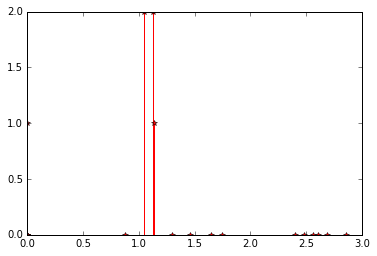


Numero de cliente en el banco
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0, 5.976262878569059, 8.149616278922167, 10.680235202899713, 22.721090185136276, 24.338002401408612, 25.638015697759908, 44.07350206969696, 70.72983509463312, 76.83511491534466, 105.02024281101001, 108.95047811358938, 109.63829820120492, 123.14459592999344, 138.30891145420532, 154.5731453902381, 157.20729471744232, 170.82636131428512, 171.08063857182665, 171.71688068036144]


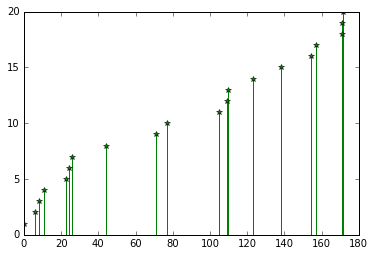

In [1]:
%matplotlib inline
import random
import simpy
import math
import matplotlib.pyplot as plt

RANDOM_SEED = 42
NEW_CUSTOMERS = 20  # Total number of customers
INTERVAL_CUSTOMERS = 4.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience
time_in_bank=12.0
l=5
Fp=[]
v=[]
wait=0
llegaron=0
atendidos=0
abandonaron=0
esperafila=0
esperabanco=0
promediofila=0
cl_fila=[]
cl_wait=[]
cl_banco=[]
cl_waitbanco=[]
xan=987654321

def generar_Congruencial(a, m, b):
    xsig=float((a*xan+b)%m)
    usig=xsig/m
    return xsig,usig

def source(env, number,interval,counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Cliente%02d' % i, counter, time_in_bank)
        env.process(c)
        t =exponencial(1.0/interval)
        yield env.timeout(t)
        
def exponencial(l):    
    global xan
    [xsig,usig]= generar_Congruencial(22695477,2**32,1)
    xan = xsig
    Finver=((-(math.log(1-usig)))/l)  
    return Finver       

def customer(env, name, counter, time_in_bank):
    global llegaron
    global atendidos
    global abandonaron
    global esperafila
    global esperabanco
    global promediofila
    global cl_fila
    global cl_wait
    global cl_banco
    global cl_waitbanco
    """Customer arrives, is served and leaves."""
    arrive = env.now
    llegaron+=1
    cl_banco.append(llegaron)
    print('%7.4f %s: Aqui estoy' % (arrive, name))
    with counter.request() as req:
        patience = uniforme(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)
        wait = env.now - arrive
        esperafila=esperafila+wait
        cl_wait.append(wait)
        cl_waitbanco.append(arrive)
        if req in results:
            # We got to the counter
            print('%7.4f %s: Espere %6.3f' % (env.now, name, wait))
            atendidos+=1
            tib = exponencial(1.0 / time_in_bank)
            yield env.timeout(tib)
            esperabanco+=env.now-arrive 
            print('%7.4f %s: Termine' % (env.now, name))
            
        else:
            # We reneged
            print('%7.4f %s: me voy despues de %6.3f' % (env.now, name, wait))
            esperabanco+=env.now-arrive
            abandonaron+=1
        promediofila+=llegaron-atendidos-abandonaron
        cl_fila.append(llegaron-atendidos-abandonaron)
def uniforme(ua,ub):
    [xsig,usig]= generar_Congruencial(22695477,2**32,1)
    xan=xsig 
    Finve=(ua+(usig*(ub-ua)))   
    return Finve
def funciones():
    print '\nNumero de clientes que llegaron: '+str(llegaron)
    print 'Numero de clientes que fueron atendidos: '+str(atendidos)
    print 'Numero de clientes abandonaron el banco: '+str(abandonaron)
    print 'Tiempo promedio de espera en la fila: '+str(esperafila/llegaron)
    print 'Tiempo promedio del cliente en el banco: '+str(esperabanco/llegaron)
    print 'Tamaño promedio de la fila: '+str(float(promediofila/float(llegaron)))
    print '\nNumero de cliente en fila'
    print cl_fila,cl_wait
    
    plt.plot(cl_wait,cl_fila,'*',color='red')
    plt.vlines(cl_wait,0,cl_fila,color='red')
    plt.show()
    print '\nNumero de cliente en el banco'
    print cl_banco,cl_waitbanco
    plt.plot(cl_waitbanco,cl_banco,'*',color='green')
    plt.vlines(cl_waitbanco,0,cl_banco,color='green')
    plt.show()
         
# Setup and start the simulation
print('Banco renegado')
random.seed(RANDOM_SEED)
env = simpy.Environment()
# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()
funciones()

Banco renegado
 0.0000 Cliente00: Aqui estoy
 0.0000 Cliente00: Espere  0.000
 2.0595 Cliente00: Termine
 2.9881 Cliente01: Aqui estoy
 2.9881 Cliente01: Espere  0.000
 4.0748 Cliente02: Aqui estoy
 5.3401 Cliente03: Aqui estoy
 7.4749 Cliente02: me voy despues de  3.400
 7.6387 Cliente03: me voy despues de  2.299
10.7637 Cliente01: Termine
11.3605 Cliente04: Aqui estoy
11.3605 Cliente04: Espere  0.000
12.1690 Cliente05: Aqui estoy
12.8190 Cliente06: Aqui estoy
15.8525 Cliente05: me voy despues de  3.683
16.6799 Cliente06: me voy despues de  3.861
20.3400 Cliente04: Termine
22.0368 Cliente07: Aqui estoy
22.0368 Cliente07: Espere  0.000
31.4327 Cliente07: Termine
35.3649 Cliente08: Aqui estoy
35.3649 Cliente08: Espere  0.000
38.4176 Cliente09: Aqui estoy
41.0675 Cliente09: me voy despues de  2.650
52.5101 Cliente10: Aqui estoy
54.4752 Cliente11: Aqui estoy
54.6431 Cliente10: me voy despues de  2.133
54.8191 Cliente12: Aqui estoy
57.9571 Cliente11: me voy despues de  3.482
58.3802 Client

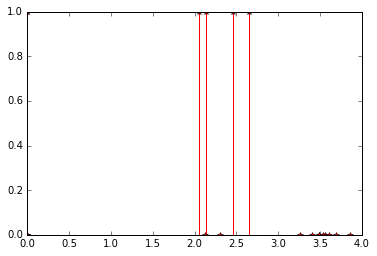


Numero de cliente en el banco
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0, 2.9881314392845293, 4.074808139461084, 5.340117601449856, 11.360545092568138, 12.169001200704306, 12.819007848879954, 22.03675103484848, 35.36491754731656, 38.41755745767233, 52.510121405505004, 54.47523905679469, 54.81914910060246, 61.57229796499672, 69.15445572710266, 77.28657269511905, 78.60364735872116, 85.84848567040447, 92.65801896882587, 92.78515759759664]


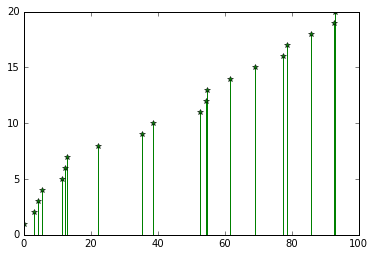

In [3]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 20
INTERVAL_CUSTOMERS = 5.0  
time_in_bank=13.0
MIN_PATIENCE = 2
MAX_PATIENCE = 4
l=5
Fp=[]
v=[]
wait=0
llegaron=0
atendidos=0
abandonaron=0
esperafila=0
esperabanco=0
promediofila=0
cl_fila=[]
cl_wait=[]
cl_banco=[]
cl_waitbanco=[]
xan=987654321
print ('Escenario A')
print('Banco renegado')
random.seed(RANDOM_SEED)
env = simpy.Environment()
# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()
funciones()

Escenario B
Banco renegado
 0.0000 Cliente00: Aqui estoy
 0.0000 Cliente00: Espere  0.000
 1.4258 Cliente00: Termine
 7.1715 Cliente01: Aqui estoy
 7.1715 Cliente01: Espere  0.000
 9.7795 Cliente02: Aqui estoy
12.1796 Cliente02: me voy despues de  2.400
12.5546 Cliente01: Termine
12.8163 Cliente03: Aqui estoy
12.8163 Cliente03: Espere  0.000
14.2715 Cliente03: Termine
27.2653 Cliente04: Aqui estoy
27.2653 Cliente04: Espere  0.000
28.4353 Cliente04: Termine
35.5541 Cliente05: Aqui estoy
35.5541 Cliente05: Espere  0.000
57.6767 Cliente06: Aqui estoy
59.5448 Cliente05: Termine
59.5448 Cliente06: Espere  1.868
65.0395 Cliente06: Termine
66.3499 Cliente07: Aqui estoy
66.3499 Cliente07: Espere  0.000
91.7165 Cliente07: Termine
135.9254 Cliente08: Aqui estoy
135.9254 Cliente08: Espere  0.000
136.5444 Cliente08: Termine
140.6417 Cliente09: Aqui estoy
140.6417 Cliente09: Espere  0.000
154.2896 Cliente09: Termine
156.8492 Cliente10: Aqui estoy
156.8492 Cliente10: Espere  0.000
159.2200 Cliente10

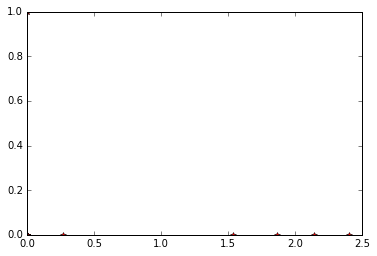


Numero de cliente en el banco
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0, 7.17151545428287, 9.7795395347066, 12.816282243479657, 27.265308222163533, 35.554074902593314, 57.67665854891778, 66.34986263833868, 135.9253921436175, 140.64167450671275, 156.849231781259, 176.36631250449832, 193.75392445253826, 194.0590571615881, 205.91305739406718, 207.74144652738363, 218.633304794589, 228.83374974686512, 241.59412313525948, 245.329164507149]


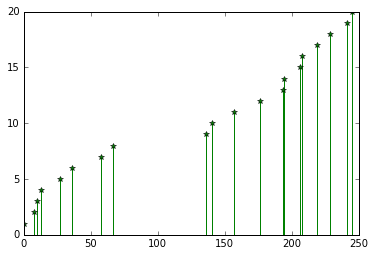

In [4]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 20
INTERVAL_CUSTOMERS = 12.0  
time_in_bank=9.0
MIN_PATIENCE = 1
MAX_PATIENCE = 3
l=5
Fp=[]
v=[]
wait=0
llegaron=0
atendidos=0
abandonaron=0
esperafila=0
esperabanco=0
promediofila=0
cl_fila=[]
cl_wait=[]
cl_banco=[]
cl_waitbanco=[]
xan=987654321
print ('Escenario B')
print('Banco renegado')
random.seed(RANDOM_SEED)
env = simpy.Environment()
# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()
funciones()

Escenario C
Banco renegado
 0.0000 Cliente00: Aqui estoy
 0.0000 Cliente00: Espere  0.000
 2.0595 Cliente00: Termine
 2.9881 Cliente01: Aqui estoy
 2.9881 Cliente01: Espere  0.000
 4.0748 Cliente02: Aqui estoy
 5.3401 Cliente03: Aqui estoy
 7.4749 Cliente02: me voy despues de  3.400
 7.6387 Cliente03: me voy despues de  2.299
10.7637 Cliente01: Termine
11.3605 Cliente04: Aqui estoy
11.3605 Cliente04: Espere  0.000
12.1690 Cliente05: Aqui estoy
12.8190 Cliente06: Aqui estoy
15.8525 Cliente05: me voy despues de  3.683
16.6799 Cliente06: me voy despues de  3.861
20.3400 Cliente04: Termine
22.0368 Cliente07: Aqui estoy
22.0368 Cliente07: Espere  0.000
31.4327 Cliente07: Termine
35.3649 Cliente08: Aqui estoy
35.3649 Cliente08: Espere  0.000
38.4176 Cliente09: Aqui estoy
41.0675 Cliente09: me voy despues de  2.650
52.5101 Cliente10: Aqui estoy
54.4752 Cliente11: Aqui estoy
54.6431 Cliente10: me voy despues de  2.133
54.8191 Cliente12: Aqui estoy
57.9571 Cliente11: me voy despues de  3.482
58

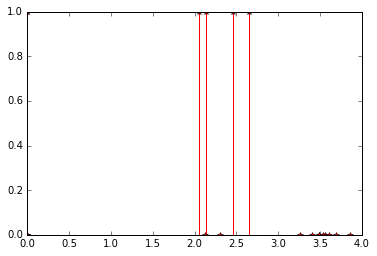


Numero de cliente en el banco
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0, 2.9881314392845293, 4.074808139461084, 5.340117601449856, 11.360545092568138, 12.169001200704306, 12.819007848879954, 22.03675103484848, 35.36491754731656, 38.41755745767233, 52.510121405505004, 54.47523905679469, 54.81914910060246, 61.57229796499672, 69.15445572710266, 77.28657269511905, 78.60364735872116, 85.84848567040447, 92.65801896882587, 92.78515759759664]


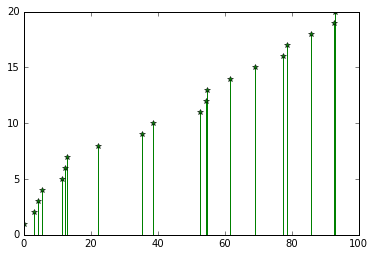

In [5]:
RANDOM_SEED = 42
NEW_CUSTOMERS = 20
INTERVAL_CUSTOMERS = 5.0  
time_in_bank=13.0
MIN_PATIENCE = 2
MAX_PATIENCE = 4
l=5
Fp=[]
v=[]
wait=0
llegaron=0
atendidos=0
abandonaron=0
esperafila=0
esperabanco=0
promediofila=0
cl_fila=[]
cl_wait=[]
cl_banco=[]
cl_waitbanco=[]
xan=987654321
print ('Escenario C')
print('Banco renegado')
random.seed(RANDOM_SEED)
env = simpy.Environment()
# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()
funciones()